# Counting Objects in images 
## By Alejandro Gómez Orjuela and Melanie Giraldo Castaño

### Introduction

#### Counting objects in images was a fundamental task in our image analysis and computer vision project. This project introduced us to basic image processing techniques and libraries in Python, helping us understand how to manipulate images and extract useful information from them. By working on this project, we developed skills to process images and automate the detection and counting of objects within images

### Objective

#### The primary objective of this project was to learn how to process images in Python to count the number of distinct objects present in them. By the end of the project, we were able to load images, preprocess them, detect objects, and visualize them with the corresponding count highlighted on the image.

### Methodology

#### To achieve the objective, we used libraries such as OpenCV, NumPy, and Matplotlib. We began by loading and displaying the images using OpenCV. The images were then converted to grayscale, simplifying the processing by reducing the image to a single channel. A threshold was applied to create a binary image, which helped in distinguishing the objects from the background. Contour detection was used to identify distinct objects within the binary image. Once the objects were detected, we counted and highlighted them on the original image. Finally, we used Matplotlib to display the original image with the detected objects and the total object count.

### 1.Import libraries

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

### 2.Charge all localpath
#### For this proyect,we will used three images,that is why we have three diferents locapath in a vector named images_paths

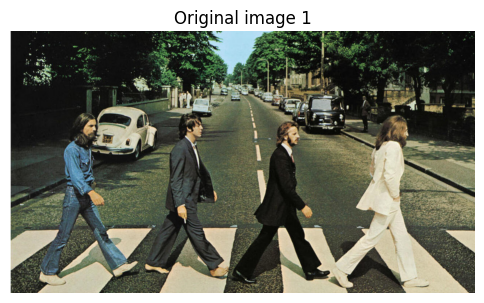

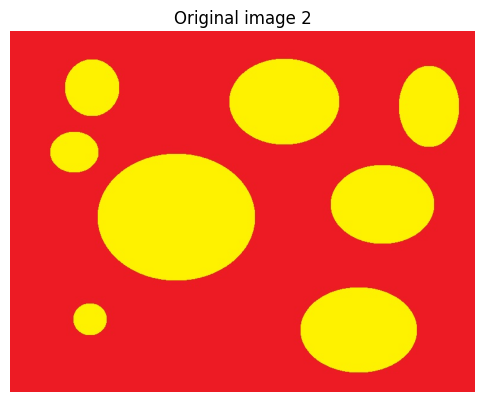

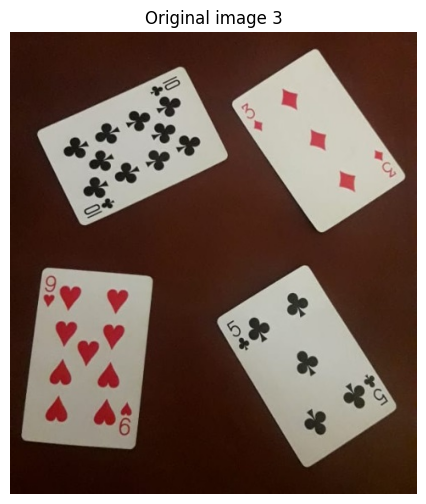

In [2]:
image_paths = [
    'data/beatles.jpg',
    'data/coins.jpg',
    'data/cartas.jpg',
]

for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning there is an error with the localpath: {image_path}")
        continue
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f'Original image {i+1}')
    plt.axis('off')
    plt.show()


### 3.Convert the image to grayscale

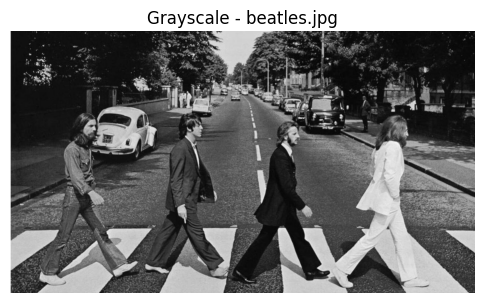

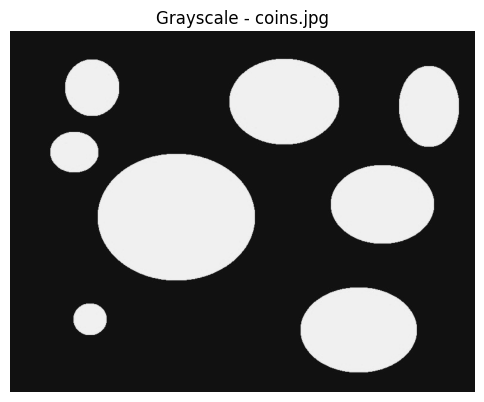

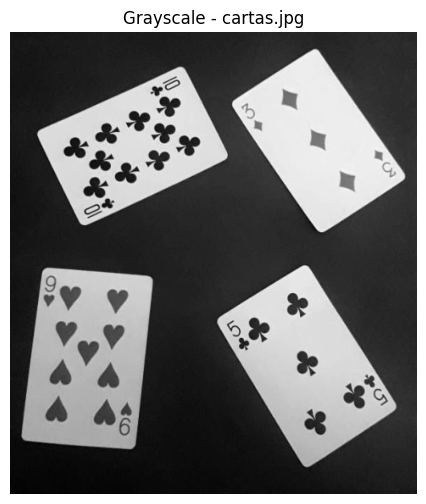

In [3]:
gray_images = []

def convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    gray_images.append(gray_image)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(gray_image, cmap='gray')
    plt.title(f'Grayscale - {os.path.basename(image_path)}')
    plt.axis('off')
    plt.show()

for image_path in image_paths:
    convert_to_grayscale(image_path)


### 4.Apply a threshold to create a binary image

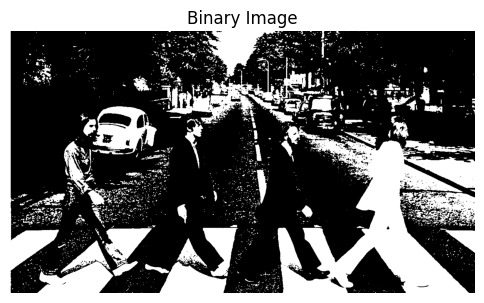

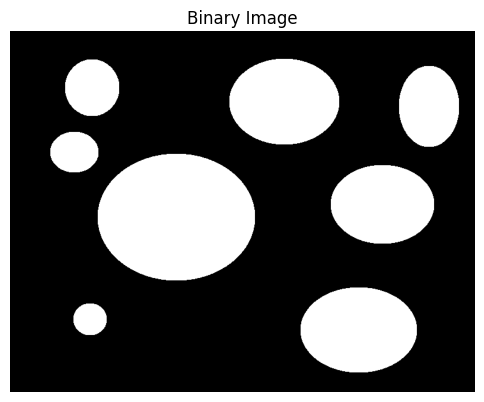

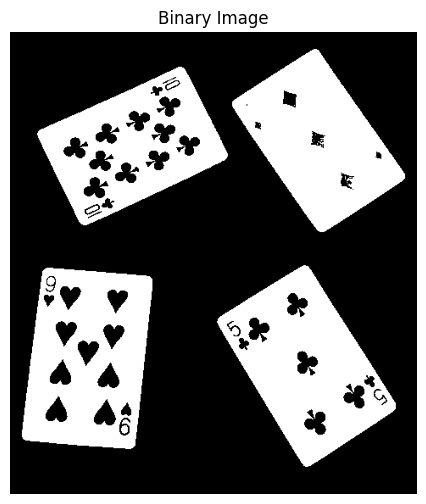

In [4]:
binary_images = []
def convert_to_binary_and_store(gray_image):
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_images.append(binary_image)
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.axis('off')
    plt.show()

for gray_image in gray_images:
    convert_to_binary_and_store(gray_image)


### 5.Use contour detection to find distinct objects

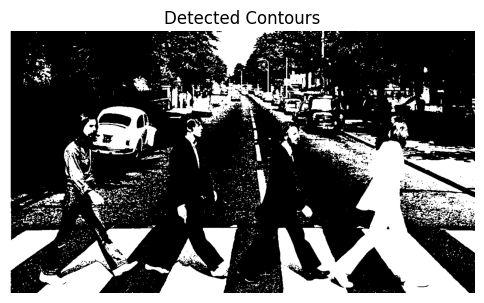

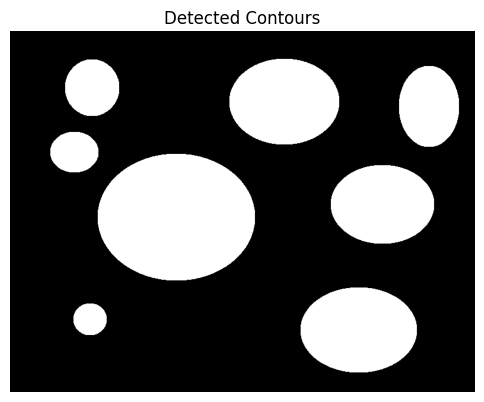

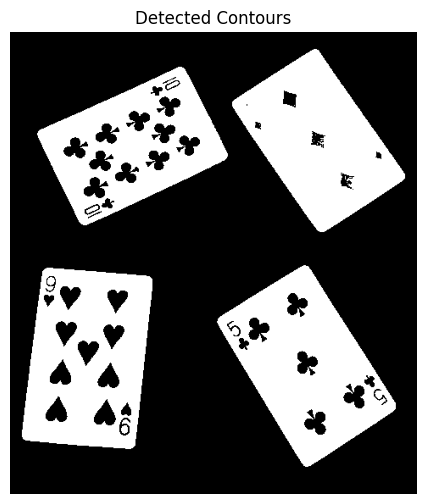

Contours detected on binary image 1: 2503
Contours detected on binary image 2: 8
Contours detected on binary image 3: 4


In [5]:
contours_list = []

def detect_and_store_contours(binary_image):
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_list.append(contours)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title('Detected Contours')
    plt.axis('off')
    plt.show()

    return contours
for binary_image in binary_images:
    detect_and_store_contours(binary_image)

for idx, contours in enumerate(contours_list):
    print(f"Contours detected on binary image {idx + 1}: {len(contours)}")

### 6.Count the number of detected objects and highlight them on the original image

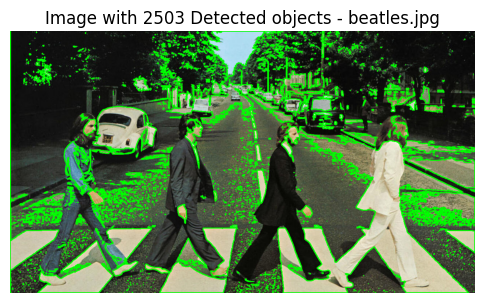

Detected objects in beatles.jpg: 2503


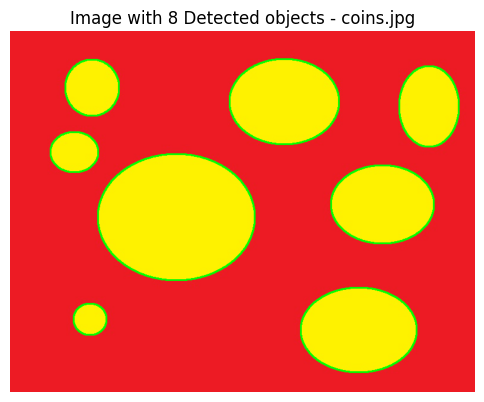

Detected objects in coins.jpg: 8


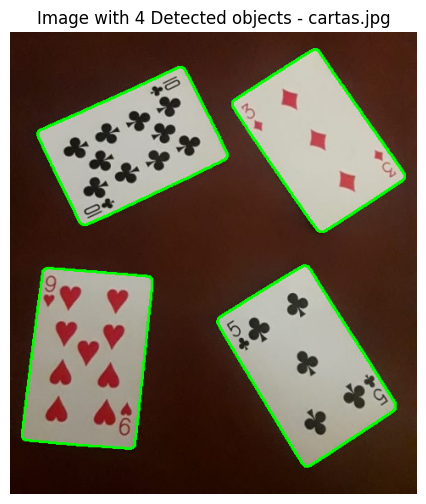

Detected objects in cartas.jpg: 4


In [6]:
def count_and_highlight_objects(original_image_path, contours):
    image = cv2.imread(original_image_path)
    num_objects = len(contours)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f'Image with {num_objects} Detected objects - {os.path.basename(original_image_path)}')
    plt.axis('off')
    plt.show()
    
    return num_objects
for idx, image_path in enumerate(image_paths):
    binary_image_path = image_path.replace('.jpg', '_binary.jpg').replace('.jpeg', '_binary.jpeg')
    contours = contours_list[idx]
    num_objects = count_and_highlight_objects(image_path, contours)
    print(f"Detected objects in {os.path.basename(image_path)}: {num_objects}")


### Conclusions

#### 1.Thresholding Limitations: We found that thresholding, while simple and effective for images with uniform backgrounds, has limitations. It doesn’t perform well with images that have complex backgrounds, varying colors, or significant depth.

#### 2.Power of Python: Python demonstrated its power and versatility throughout this project. With libraries like OpenCV and NumPy, we were able to efficiently process images and solve complex problems, showcasing Python's capability in image processing and beyond.